In [2]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

In [3]:
def compute_cost_linear_reg(X, y, w, b, lambda_=1):
    """
    Computes the cost over all examples
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns:
      total_cost (scalar):  cost
    """
    m = X.shape[0]
    f_wb = np.dot(X, w) + b
    e = f_wb - y
    cost = np.sum(e**2) + lambda_ * np.sum(w**2)
    cost = cost / (2 * m)
    return cost

In [4]:
np.random.seed(1)
X_tmp = np.random.rand(5, 6)
y_tmp = np.array([0, 1, 0, 1, 0])
w_tmp = (
    np.random.rand(X_tmp.shape[1]).reshape(
        -1,
    )
    - 0.5
)
b_tmp = 0.5
lambda_tmp = 0.7
cost_tmp = compute_cost_linear_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print("Regularized cost:", cost_tmp)

Regularized cost: 0.07917239320214275


In [5]:
def log_1pexp(z):
    z = np.asarray(z, dtype=np.float64)
    out = np.where(z >= 0, z + np.log1p(np.exp(-z)), np.log1p(np.exp(z)))
    return out

In [6]:
def compute_cost_logistic_reg(X, y, w, b, lambda_=1):
    """
    Computes the cost over all examples
    Args:
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns:
      total_cost (scalar):  cost
    """
    m = X.shape[0]
    z = np.dot(X, w) + b
    cost = -y * z + log_1pexp(z)
    cost = np.sum(cost) + (lambda_ / 2) * np.sum(w**2)
    cost = cost / m
    return cost

In [7]:
np.random.seed(1)
X_tmp = np.random.rand(5, 6)
y_tmp = np.array([0, 1, 0, 1, 0])
w_tmp = (
    np.random.rand(X_tmp.shape[1]).reshape(
        -1,
    )
    - 0.5
)
b_tmp = 0.5
lambda_tmp = 0.7
cost_tmp = compute_cost_logistic_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print("Regularized cost:", cost_tmp)

Regularized cost: 0.6850849138741671


In [8]:
def compute_gradient_linear_reg(X, y, w, b, lambda_):
    """
    Computes the gradient for linear regression
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization

    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b.
    """
    m = X.shape[0]
    f_wb = np.dot(X, w) + b
    e = f_wb - y
    dj_db = (1 / m) * np.sum(e)
    dj_dw = (1 / m) * (np.dot(X.T, e) + lambda_ * w)
    return dj_db, dj_dw

In [9]:
np.random.seed(1)
X_tmp = np.random.rand(5, 3)
y_tmp = np.array([0, 1, 0, 1, 0])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
dj_db_tmp, dj_dw_tmp = compute_gradient_linear_reg(
    X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp
)

print(
    f"dj_db: {dj_db_tmp}",
)
print(
    f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}",
)

dj_db: 0.6648774569425727
Regularized dj_dw:
 [0.2965321474882228, 0.49116796259180334, 0.21645877535865862]


In [10]:
def sigmoid(z):
    z = np.asarray(z, dtype=np.float64)
    out = np.where(z >= 0, 1 / (1 + np.exp(-z)), np.exp(z) / (1 + np.exp(z)))
    return out

In [11]:
def compute_gradient_logistic_reg(X, y, w, b, lambda_):
    """
    Computes the gradient for linear regression

    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns
      dj_dw (ndarray Shape (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar)            : The gradient of the cost w.r.t. the parameter b.
    """
    m = X.shape[0]
    z = np.dot(X, w) + b
    f_wb = sigmoid(z)
    e = f_wb - y
    dj_db = (1 / m) * np.sum(e)
    dj_dw = (1 / m) * (np.dot(X.T, e) + lambda_ * w)
    return dj_db, dj_dw

In [12]:
np.random.seed(1)
X_tmp = np.random.rand(5, 3)
y_tmp = np.array([0, 1, 0, 1, 0])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic_reg(
    X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp
)

print(
    f"dj_db: {dj_db_tmp}",
)
print(
    f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}",
)

dj_db: 0.34179899497279104
Regularized dj_dw:
 [0.17380012933994293, 0.3200750788156695, 0.10776313396851499]


In [2]:
from plt_overfit import overfit_example, output

Output()

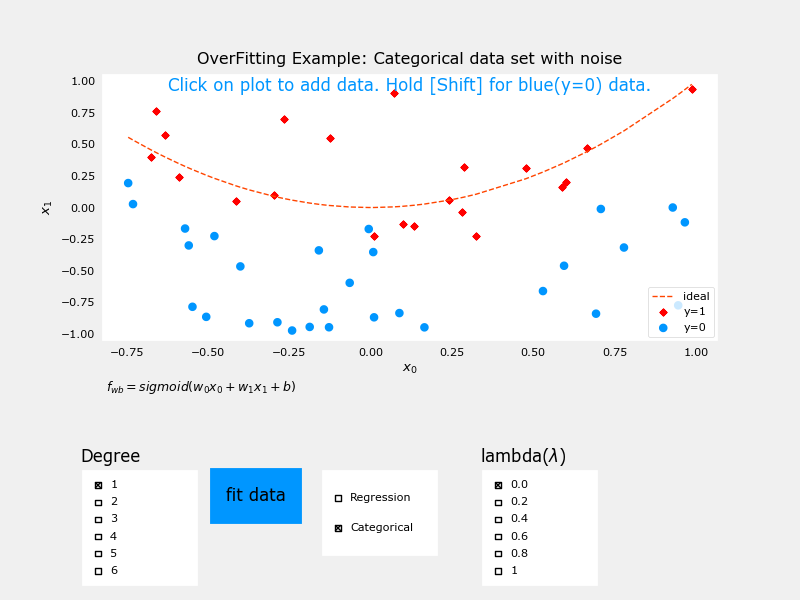

In [3]:
plt.close("all")
display(output)
ofit = overfit_example(True)